In [204]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import os

# https://stackoverflow.com/questions/47391702/matplotlib-making-a-colored-markers-legend-from-scratch

In [329]:
def lambda_scale_factor2blob_size(scale_factors):
    return (np.array(scale_factors)**3)*10
    
x_scale_name = 'log10'
y_scale_name = 'log'

    
def y_scale(y):
    return eval(f'np.{y_scale_name}')(np.array(y).astype('float'))

def x_scale(x):
    return eval(f'np.{x_scale_name}')(np.array(x).astype('float'))

    
def draw(compression_value, shape_size_list, value_list, marker= 'o', edgecolor= 'r', facecolor='none', ymax= 0.5, ymin= 0.0):    
    shape_size_list = shape_size_list[np.where(value_list != 'NA')]
    
    if len(shape_size_list)==0:return 
    value_list = y_scale(value_list[np.where(value_list != 'NA')])
    
    
    
    r_list= np.array([compression_value]*len(value_list))
    plt.scatter(r_list, value_list, s= shape_size_list, facecolors=facecolor, edgecolors=edgecolor, marker= marker, linewidths=3, alpha= 0.7)
    plt.vlines(compression_value, ymin=ymin, ymax= ymax, linestyles='--', alpha= 0.1)
    
def compact_plot(heatmap, Ts, lambda_scale_factors, plot_params):
    edgecolor = plot_params['edgecolor']
    facecolor = plot_params['facecolor']
    marker = plot_params['marker']

    T_grid = torch.tile(Ts.reshape(-1, 1), (1, len(lambda_scale_factors)))
    lmbda_scale_grid =  torch.tile(lambda_scale_factors.reshape(1, -1), (len(Ts), 1))

    compression_grid = T_grid/(2**(2*(lmbda_scale_grid-1)))
    
    ymax= y_scale(heatmap[np.where(heatmap != 'NA')].max())
    ymin= y_scale(heatmap[np.where(heatmap != 'NA')].min())
    
    unique_compression_values = sorted(list(set(compression_grid.flatten().numpy())), reverse= True)
    for compression_value in unique_compression_values:
        heatmap_vals = heatmap[compression_grid == compression_value]
        corres_scale_facts = lambda_scale_factors[torch.where(compression_grid == compression_value)[1]]
        shape_size_list = lambda_scale_factor2blob_size(corres_scale_facts)
        
        s = draw(x_scale(compression_value), shape_size_list, heatmap_vals, marker= marker, edgecolor= edgecolor, facecolor=facecolor, ymax= ymax, ymin= ymin)
    return s

def plot_all_compact(plot_param_list, Ts, lambda_scale_factors, ylabel= 'MSE'):
    legends_colorshapes= []
    legends_sizes= []
    

    #plt.figure(figsize= (10, 6))

    for plot_params in plot_param_list: 
        
        s = compact_plot(plot_params['heatmap'], Ts, lambda_scale_factors, plot_params= plot_params)
        legend_name = ' '.join(plot_params['name'].split('@')[-3:])
        legends_colorshapes.append(mlines.Line2D([], [], markeredgecolor= plot_params['edgecolor'], markerfacecolor= plot_params['facecolor'], marker=plot_params['marker'], linestyle='None',
                                markersize=10, label=legend_name, markeredgewidth=2))
    
    marker_size_list = lambda_scale_factor2blob_size(np.array(lambda_scale_factors))**0.5  # marker_size= blob_size **0.5 in matplotlib
    for i in range(len(marker_size_list)):
        scale_factor= lambda_scale_factors[i]
        marker_size = marker_size_list[i]
        legends_sizes.append(mlines.Line2D([], [], markeredgecolor= 'black', markerfacecolor= 'white', marker= 'o', linestyle='None',
                                markersize=marker_size, label=f'        downscale : {2**(scale_factor-1)}x{2**(scale_factor-1)}', markeredgewidth=3))
        
    if 'MSE' in ylabel:
        locs=[3,1]
    elif 'SSIM' in ylabel:
        locs=[2, 4]
    else:
        locs=[3,1]
    legend1 = plt.legend(handles=legends_colorshapes, loc=locs[0], prop={'size': 12})
    plt.gca().add_artist(legend1)
    if 'SSIM' in ylabel:
        plt.legend(handles=legends_sizes, loc=locs[1], bbox_to_anchor=(1,0.2), prop={'size': 12})
    else:
        plt.legend(handles=legends_sizes, loc=locs[1], bbox_to_anchor=(1,0.97), prop={'size': 12})
        #plt.legend(handles=legends_sizes, loc=locs[1])
    plt.ylabel(ylabel, fontsize= 20)
    plt.xlabel(f'{x_scale_name}(Compression Ratio) [<0 is compressed]', fontsize= 20)

In [330]:
!pwd

/n/home06/udithhaputhanthri/project_udith/aim2/compact_plot_notebooks


In [331]:
!ls '/n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/heatmaps'

heatmaps_mnistv28.pdf
MSE@@rotation_lambda(10000.0)@img_size(256)@num_samples_train(3000)@@highlrH.npy
MSE@@rotation_lambda(10000.0)@img_size(256)@num_samples_train(3000).jpg
MSE@@rotation_lambda(10000.0)@img_size(256)@num_samples_train(3000)@@lowlrH.npy
MSE@@rotation_lambda(10.0)@img_size(256)@num_samples_train(3000)@@highlrH.npy
MSE@@rotation_lambda(10.0)@img_size(256)@num_samples_train(3000).jpg
MSE@@rotation_lambda(10.0)@img_size(256)@num_samples_train(3000)@@lowlrH.npy
SSIM11@@rotation_lambda(10000.0)@img_size(256)@num_samples_train(3000)@@highlrH.npy
SSIM11@@rotation_lambda(10000.0)@img_size(256)@num_samples_train(3000).jpg
SSIM11@@rotation_lambda(10000.0)@img_size(256)@num_samples_train(3000)@@lowlrH.npy
SSIM11@@rotation_lambda(10.0)@img_size(256)@num_samples_train(3000)@@highlrH.npy
SSIM11@@rotation_lambda(10.0)@img_size(256)@num_samples_train(3000).jpg
SSIM11@@rotation_lambda(10.0)@img_size(256)@num_samples_train(3000)@@lowlrH.npy


In [332]:
exp_set_dir = '/n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28'

In [333]:
import glob
mode= 'MSE'


heatmaps= sorted(glob.glob(f'{exp_set_dir}/heatmaps/{mode}@@rotation_lambda(10000.0)*.npy'), key= lambda x: x.split('/')[-1].split('@@')[-1])
heatmaps

['/n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/heatmaps/MSE@@rotation_lambda(10000.0)@img_size(256)@num_samples_train(3000)@@highlrH.npy',
 '/n/holyscratch01/wadduwage_lab/uom_Udith/results/aim2/figs/mnistv28/heatmaps/MSE@@rotation_lambda(10000.0)@img_size(256)@num_samples_train(3000)@@lowlrH.npy']

In [334]:

interested_heatmaps= [
f'{exp_set_dir}/heatmaps/{mode}@@rotation_lambda(10000.0)@img_size(256)@num_samples_train(3000)@@highlrH.npy',
f'{exp_set_dir}/heatmaps/{mode}@@rotation_lambda(10000.0)@img_size(256)@num_samples_train(3000)@@lowlrH.npy']

In [335]:
#interested_heatmaps = [heatmaps[2], heatmaps[1]]
#interested_heatmaps

In [336]:
edgecolors= ['g', 'r']
markers= ['o', 'o']

In [337]:
np.load(np_dir).shape

(2, 6, 7)

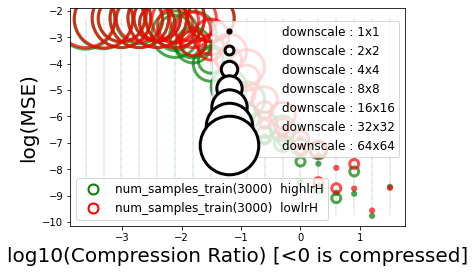

In [338]:
assert len(interested_heatmaps) == len(edgecolors), 'n_heatmaps != n_colors'

Ts = torch.tensor([1,2,4,8,16,32])
lambda_scale_factors= torch.tensor([1, 2, 3, 4, 5, 6, 7])

plot_param_list = []
for idx in range(len(interested_heatmaps)):
    np_dir= interested_heatmaps[idx]

    metrics_measured = np_dir.split('/')[-1].split('@@')[0]
    plot_ylabel= f'{y_scale_name}({metrics_measured})'

    heatmap= np.load(np_dir)[0]
    heatmap= heatmap.astype(object)
    #heatmap[np.where(epoch_map == 0)] = 'NA'
    name= np_dir.split('/')[-1][:-4]
    plot_param_list.append({'heatmap': heatmap, 'edgecolor': edgecolors[idx], 'facecolor':'none', 'marker':markers[idx], 'name': name})

plot_all_compact(plot_param_list, Ts, lambda_scale_factors, ylabel= plot_ylabel)
#plt.savefig(f'figs_for_paper/fig1_ssim.pdf')

In [339]:
list(range(start_idx[i],end_idx[i]))

[3, 4, 5, 6]

In [340]:
np.load(np_dir)[0][i:i+1, list(range(start_idx[i],end_idx[i]))].shape


(1, 4)

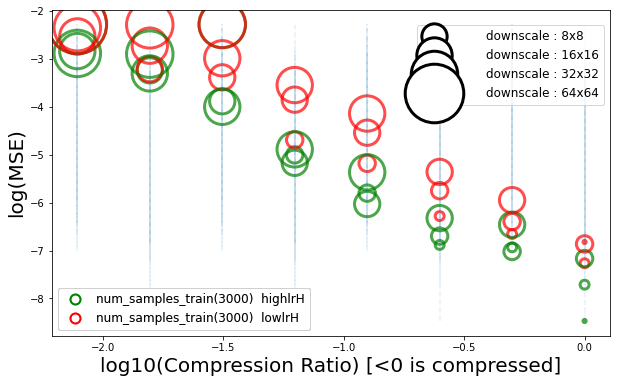

In [341]:
assert len(interested_heatmaps) == len(edgecolors), 'n_heatmaps != n_colors'

Ts = torch.tensor([1,2,4,8,16,32])
lambda_scale_factors= torch.tensor([1, 2, 3, 4, 5, 6, 7])

all_combs=  [[1, [1,2,3,4]], [2, [2,3,4,5]], [4, [2,3,4,5]], [8, [3,4,5,6]], [16, [3,4,5,6]], [32, [4,5,6,7]]]
start_idx= [0,1,1,2,2,3]
end_idx= [4,5,5,6,6,7]

plt.figure(figsize= (10, 6))
for i in range(len(all_combs)):
    
    Ts= torch.tensor([all_combs[i][0]])
    lambda_scale_factors = torch.tensor(all_combs[i][1])
    
    plot_param_list = []
    for idx in range(len(interested_heatmaps)):
        np_dir= interested_heatmaps[idx]

        metrics_measured = np_dir.split('/')[-1].split('@@')[0]
        plot_ylabel= f'{y_scale_name}({metrics_measured})'

        heatmap= np.load(np_dir)[0][i:i+1, list(range(start_idx[i],end_idx[i]))] #np.load(np_dir)
        heatmap= heatmap.astype(object)
        #heatmap[np.where(epoch_map == 0)] = 'NA'
        name= np_dir.split('/')[-1][:-4]
        plot_param_list.append({'heatmap': heatmap, 'edgecolor': edgecolors[idx], 'facecolor':'none', 'marker':markers[idx], 'name': name})

    plot_all_compact(plot_param_list, Ts, lambda_scale_factors, ylabel= plot_ylabel)
    plt.savefig(f'../figs_for_paper/fig_{mode}_patchmnist.pdf')